Tests the method on a nonlinear pendulum, 

$$
\frac{d^2 \theta}{dt^2} + a \sin \theta = 0
$$

The tests select an initial $d \theta / dt$ from a uniform distribution, an initial $\theta$ from a uniform distribution, and a value of $a$ from a normal distribution. 

In [1]:
import ipywidgets as ipw
from IPython.display import display

from stochastic_repro import start_pool
from stochastic_models import model_nlpendulum
from stochastic_tests import Test

t_fin = 10.0
num_steps = 1000
test_kwargs = dict(t_fin=t_fin, 
                   num_steps=num_steps, 
                   sample_times=[t_fin / num_steps * i for i in range(1, num_steps + 1)], 
                   trials=[10, 100, 1000, 10000],
                   stochastic=False)

def do_test(_test):
    _test.execute_deterministic()
    _test.plot_results_deterministic()

    label, out = ipw.Label(), ipw.Output()
    display(out)
    with out:
        display(label)
    _test.execute_stochastic(label)
    out.clear_output()
    _test.plot_results_stochastic()
    _test.plot_stats()
    _test.plot_distributions()
    _test.find_ecfs()
    _test.measure_ecf_diffs()
    _test.test_sampling(err_thresh=1E-3)
    preview_time = _test.max_ks_stat_time(_test.trials[-1])
    # preview_time = _test.min_final_eval_time(_test.trials[-1])
    _test.plot_ecf(time=preview_time)
    _test.plot_ecf_diffs()
    _test.plot_ecf_comparison(time=preview_time)
    _test.plot_ecf(time=5.0)
    _test.plot_ecf_diffs()
    _test.plot_ecf_comparison(time=5.0)
    _test.plot_ks_sampling()

    for t in _test.trials:
        ecf_ks_stat_t = {n: -1 for n in _test.model.results_names}
        for ks in _test.ecf_ks_stat[t]:
            for n, ks_stat in ks.items():
                ecf_ks_stat_t[n] = max(ecf_ks_stat_t[n], ks_stat)
        print(f'{t} trials')
        for n, ks_stat in ecf_ks_stat_t.items():
            print(f'\t{n}: {ks_stat}')

def do_fits(_test):
    _test.generate_ecf_diff_fits()
    _, axs = _test.plot_ecf_diff_fits(_test.plot_ecf_diffs())
    _ = axs[0].legend()

    _test.generate_ecf_sampling_fits()
    _, ax = _test.plot_ecf_sampling_fits(_test.plot_ecf_sampling())
    _ = ax.legend()

start_pool()

[91473, 91474, 91475, 91477, 91476, 91478, 91479, 91481, 91480, 91482]

Test 1: initial $d \theta / dt$ from a uniform distribution.

Output()

10 trials
	t: 1.7350483539506314
	v: 1.7968914233466833
100 trials
	t: 0.5301735644755509
	v: 0.6588076672068621
1000 trials
	t: 0.15727381601827367
	v: 0.1544579056419742
10000 trials
	t: 0.04733330830801706
	v: 0.05299776353961946


/Users/timothy.sego/Desktop/Current/stochastic_repro/stochastic_repro.py:992: OptimizeWarning: Covariance of the parameters could not be estimated
  return curve_fit(fit_func, data_x, data_y, **kwargs)


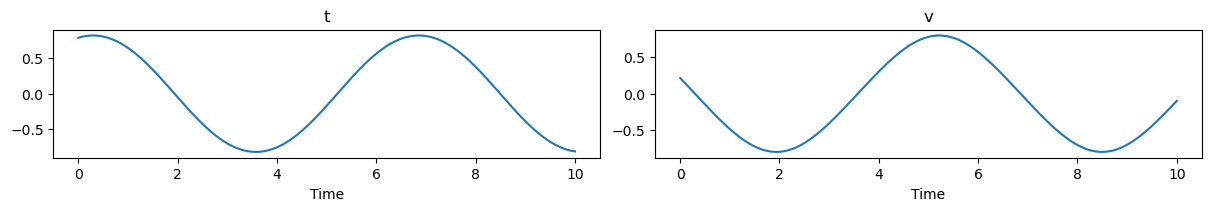

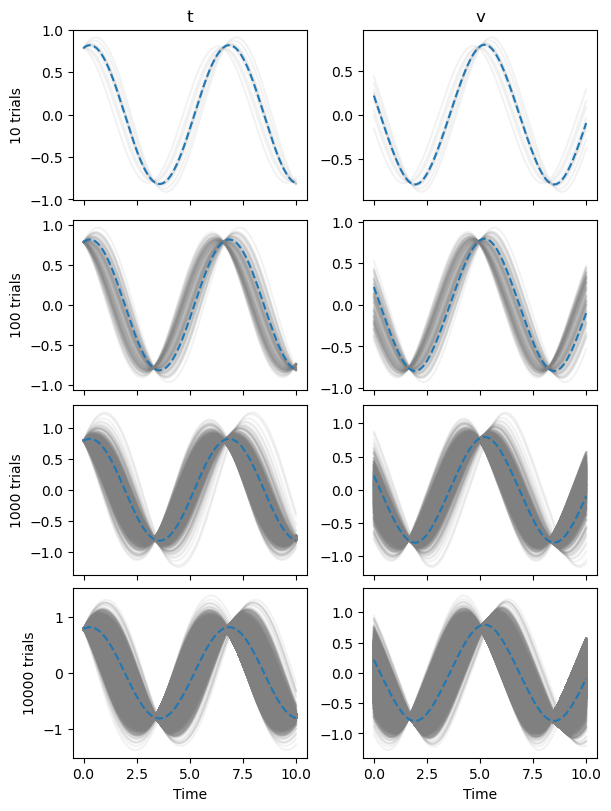

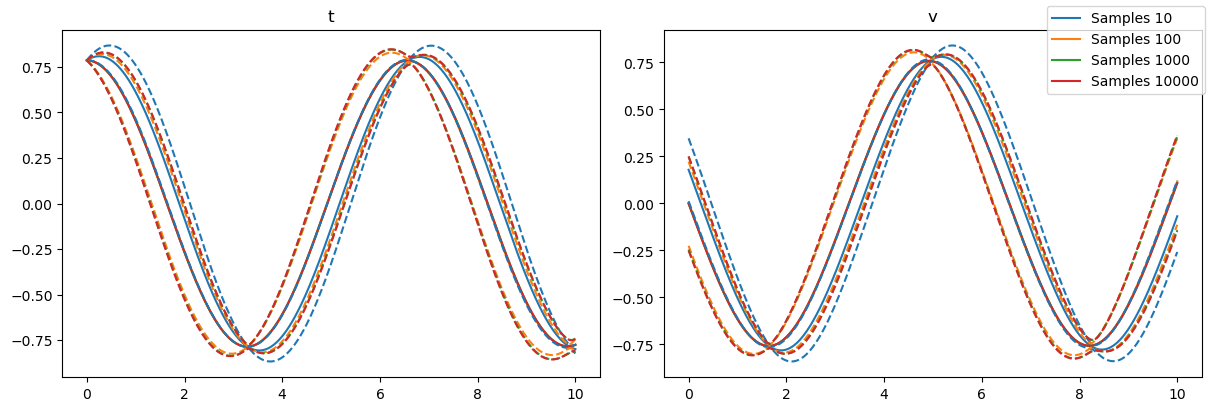

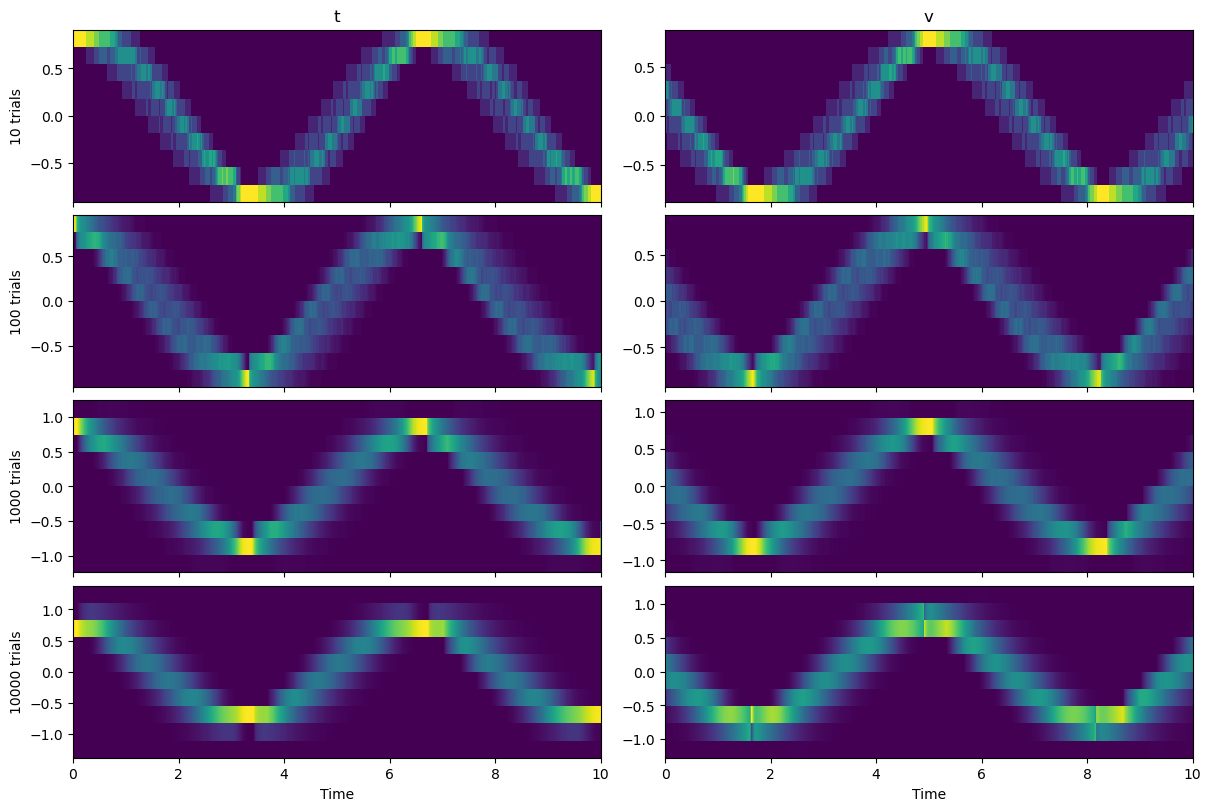

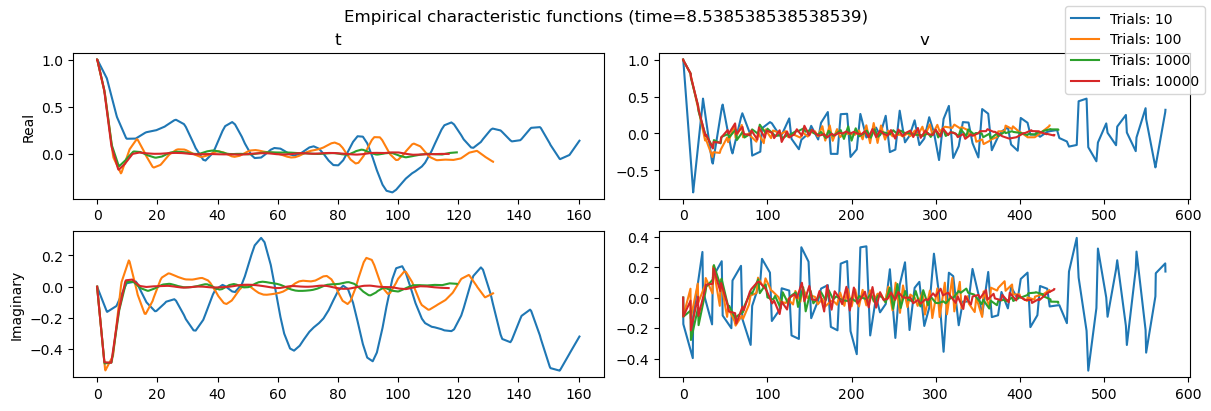

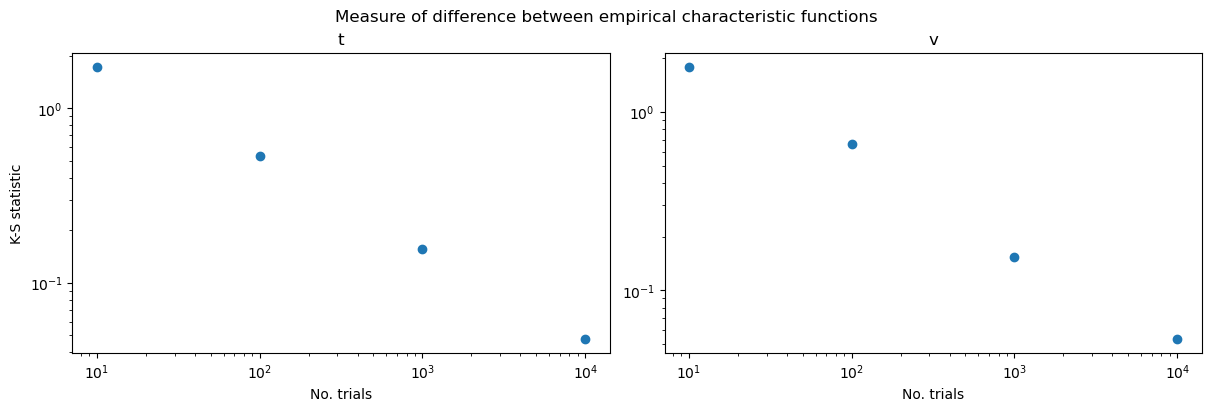

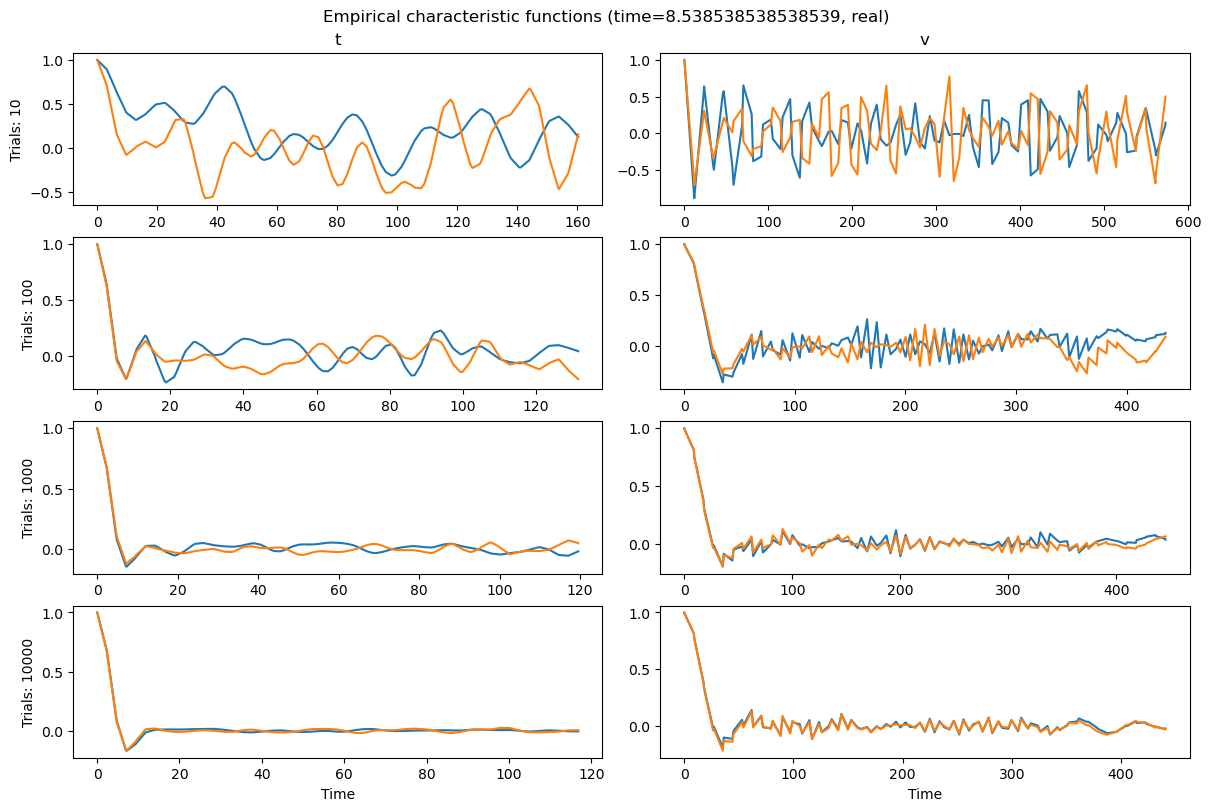

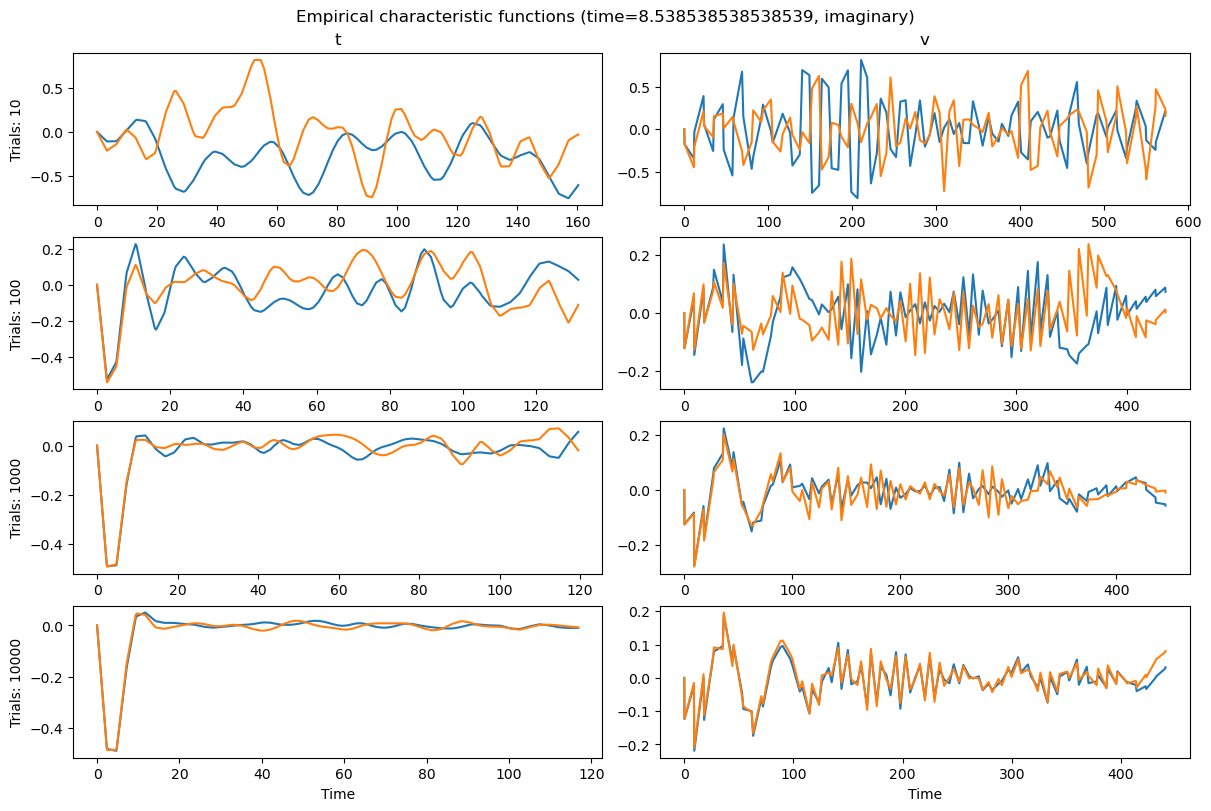

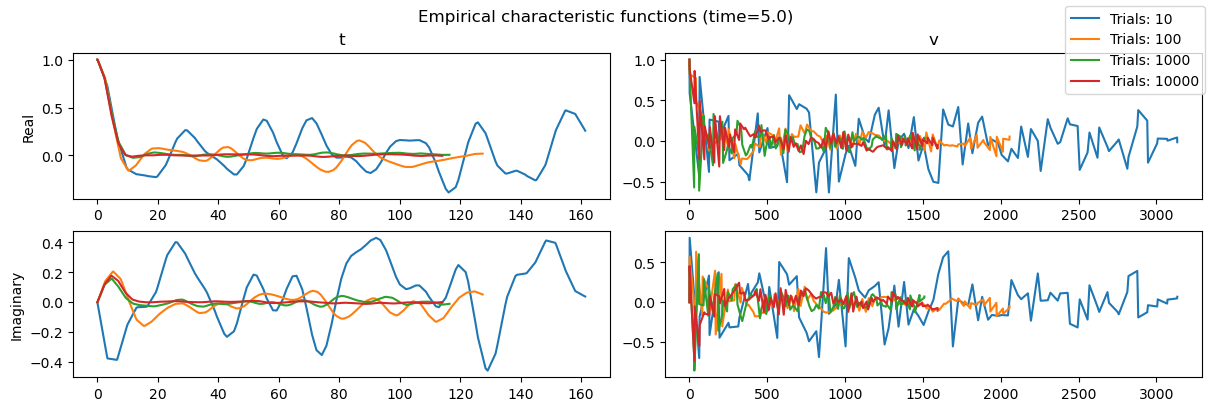

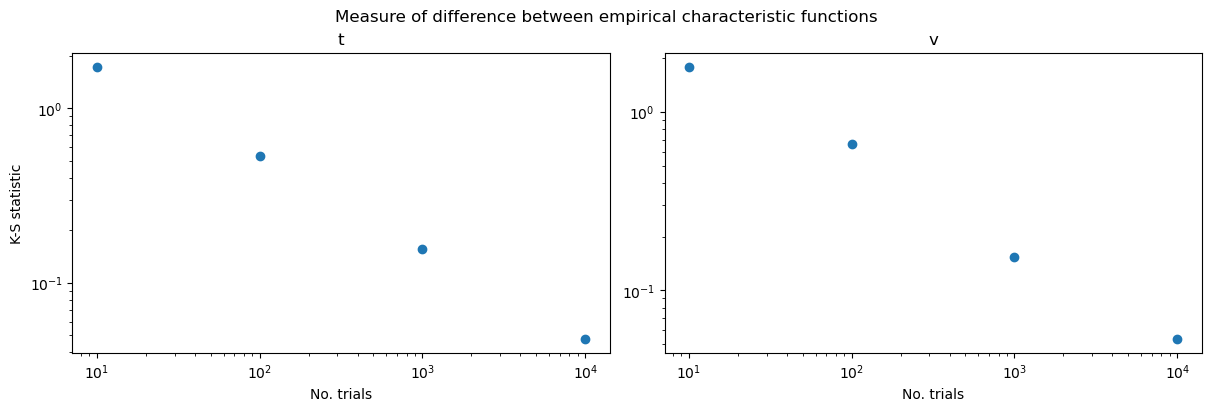

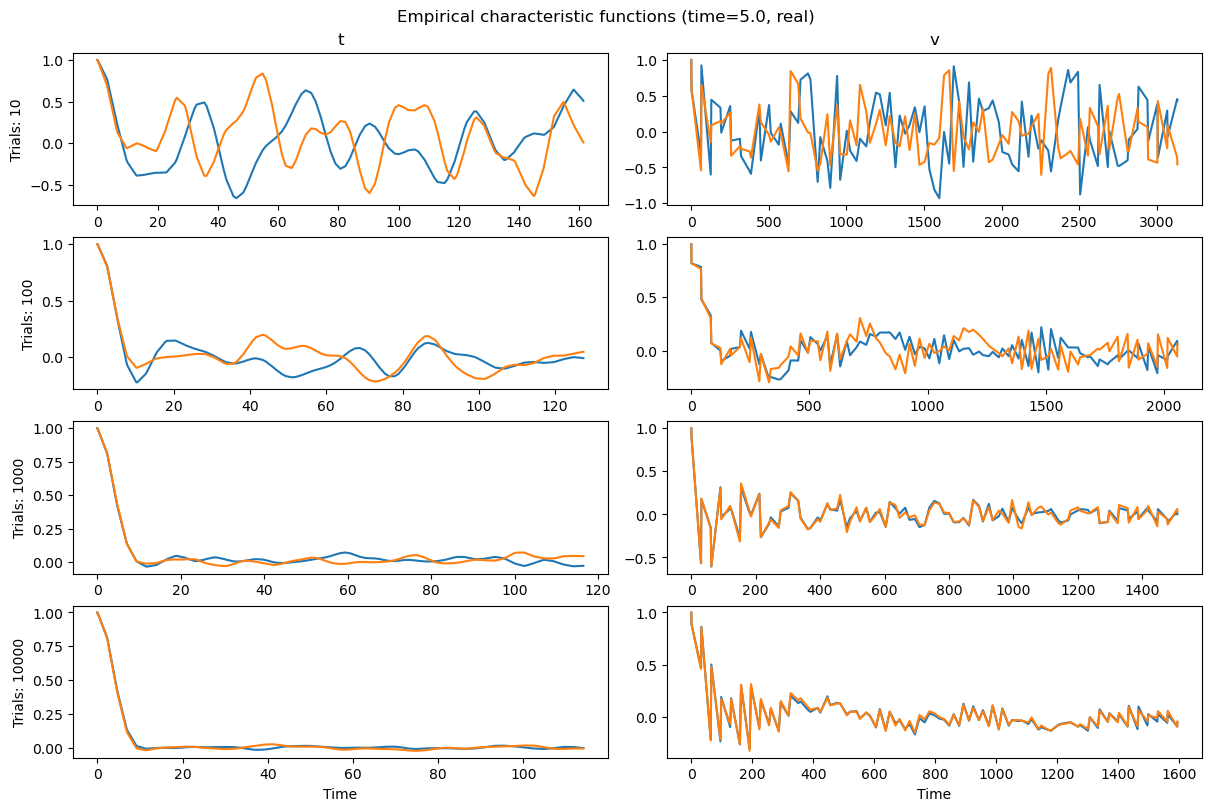

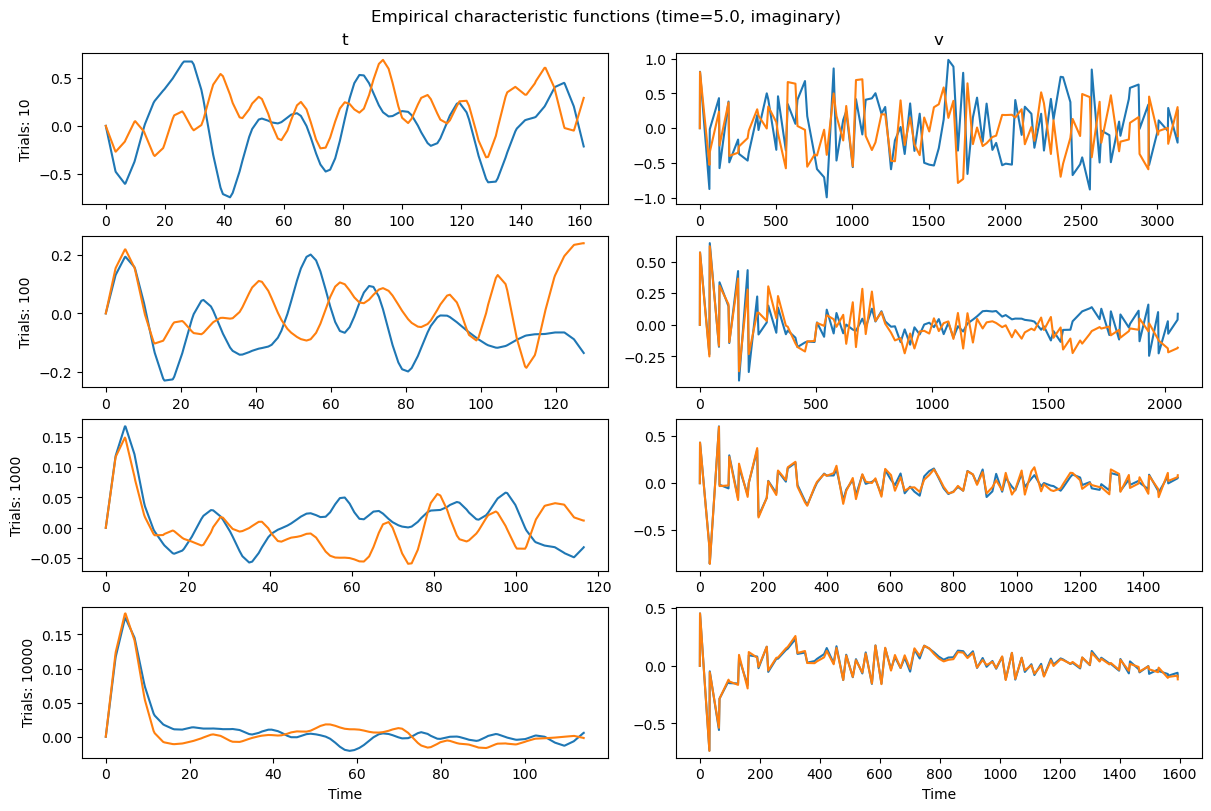

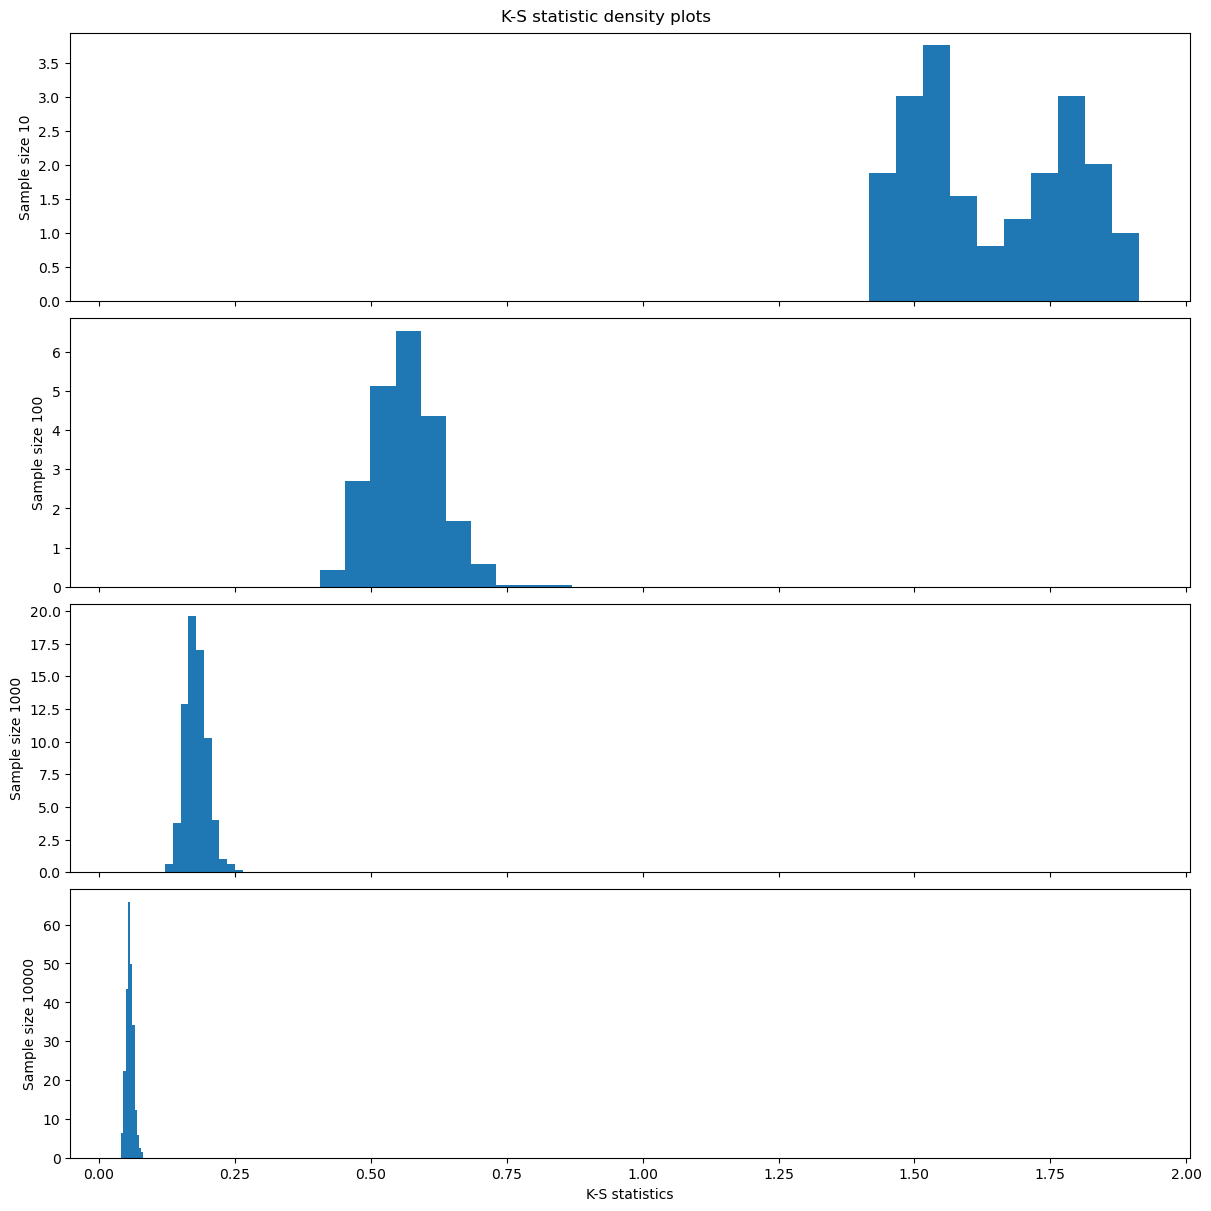

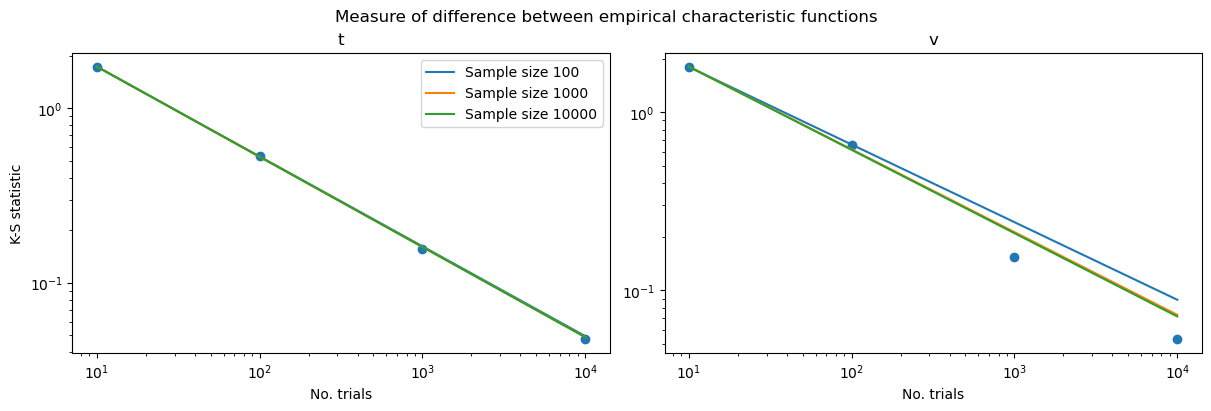

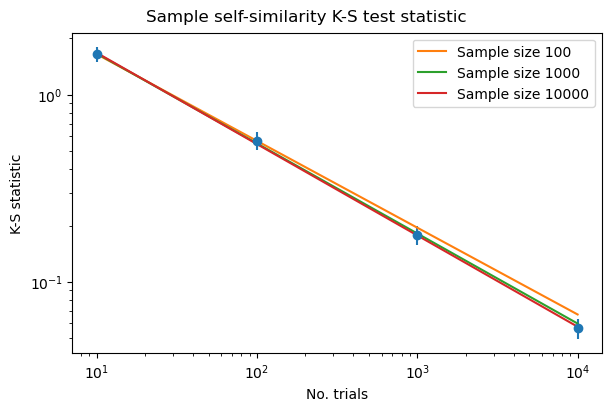

In [2]:
# Runtime: ~55 minutes (M1 max)
test = Test(model=model_nlpendulum({'v': ('norm', (0.0, 0.25))}), **test_kwargs)
do_test(test)
do_fits(test)

Test 2: initial $\theta$ from a uniform distribution. 

Output()

10 trials
	t: 1.6284352634096393
	v: 1.5231598834151852
100 trials
	t: 0.641617846666584
	v: 0.6966706177067132
1000 trials
	t: 0.16006270515804036
	v: 0.15638399936362934
10000 trials
	t: 0.052659814563341
	v: 0.053501993615119495


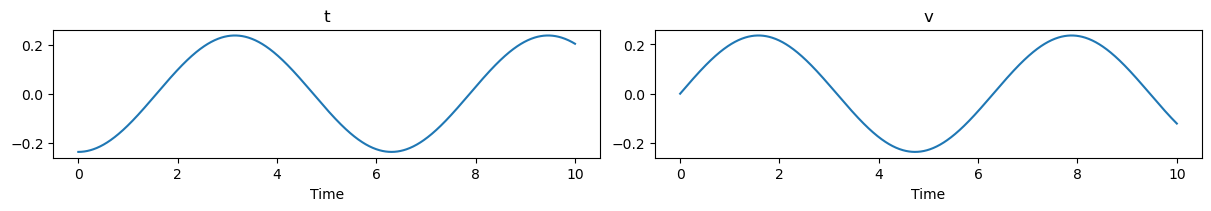

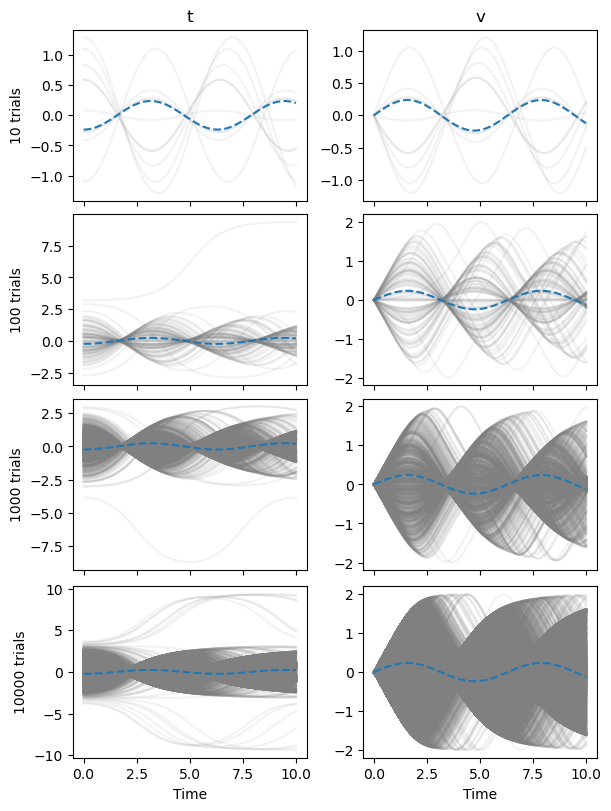

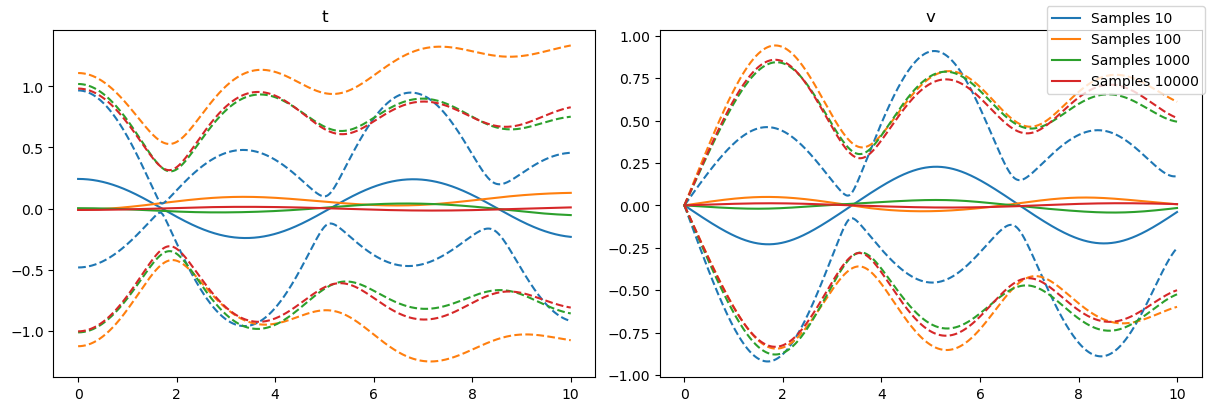

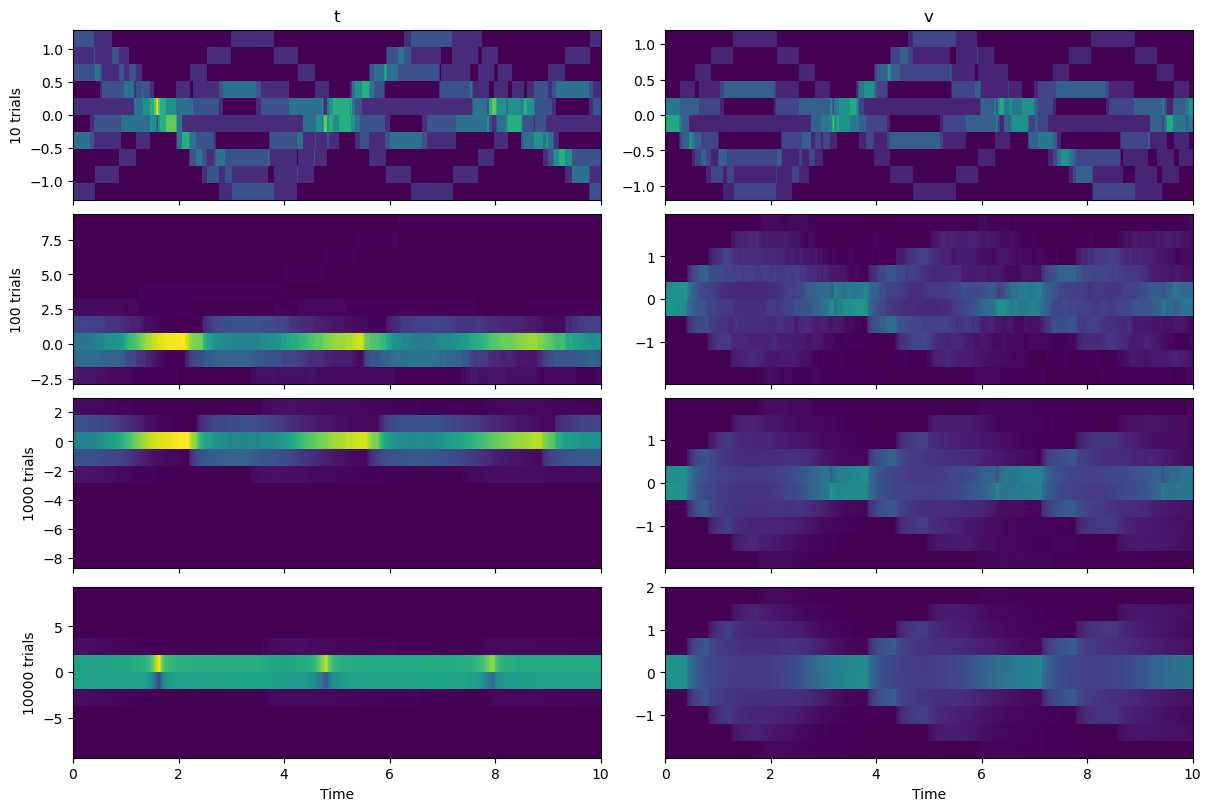

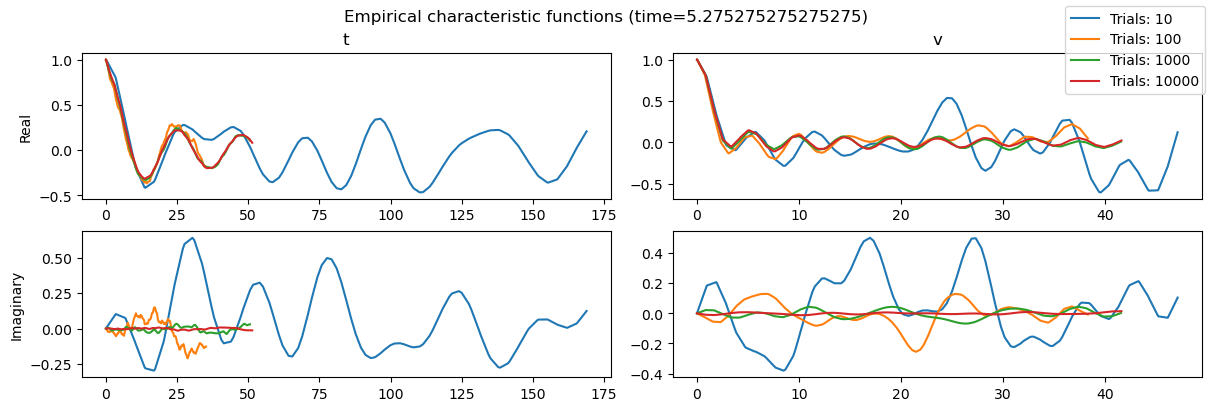

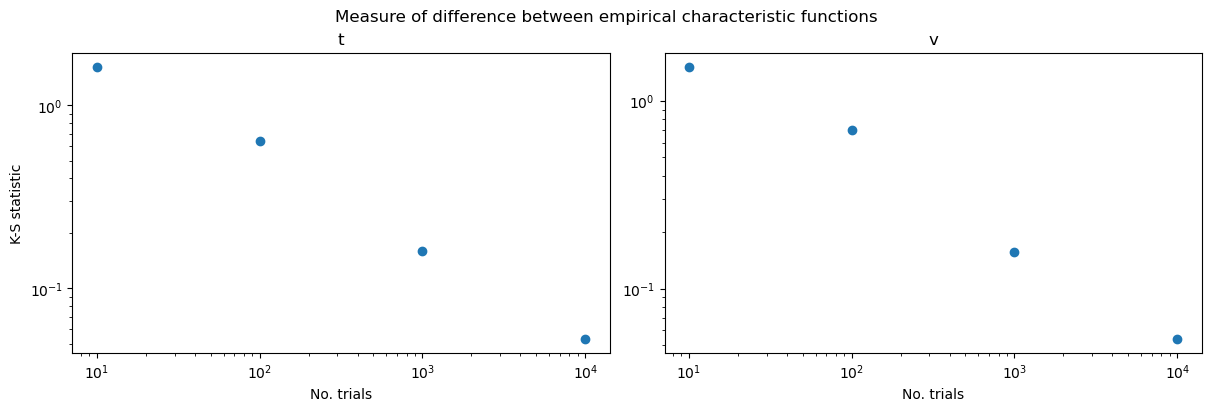

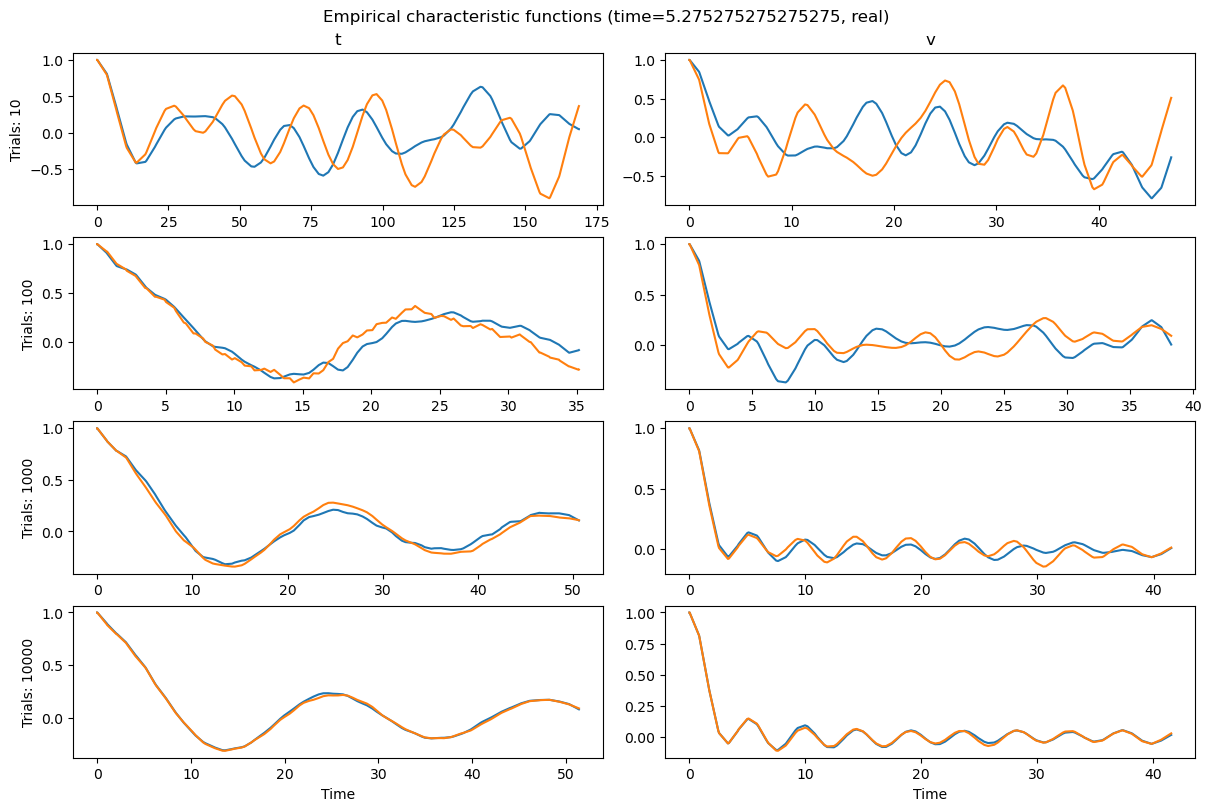

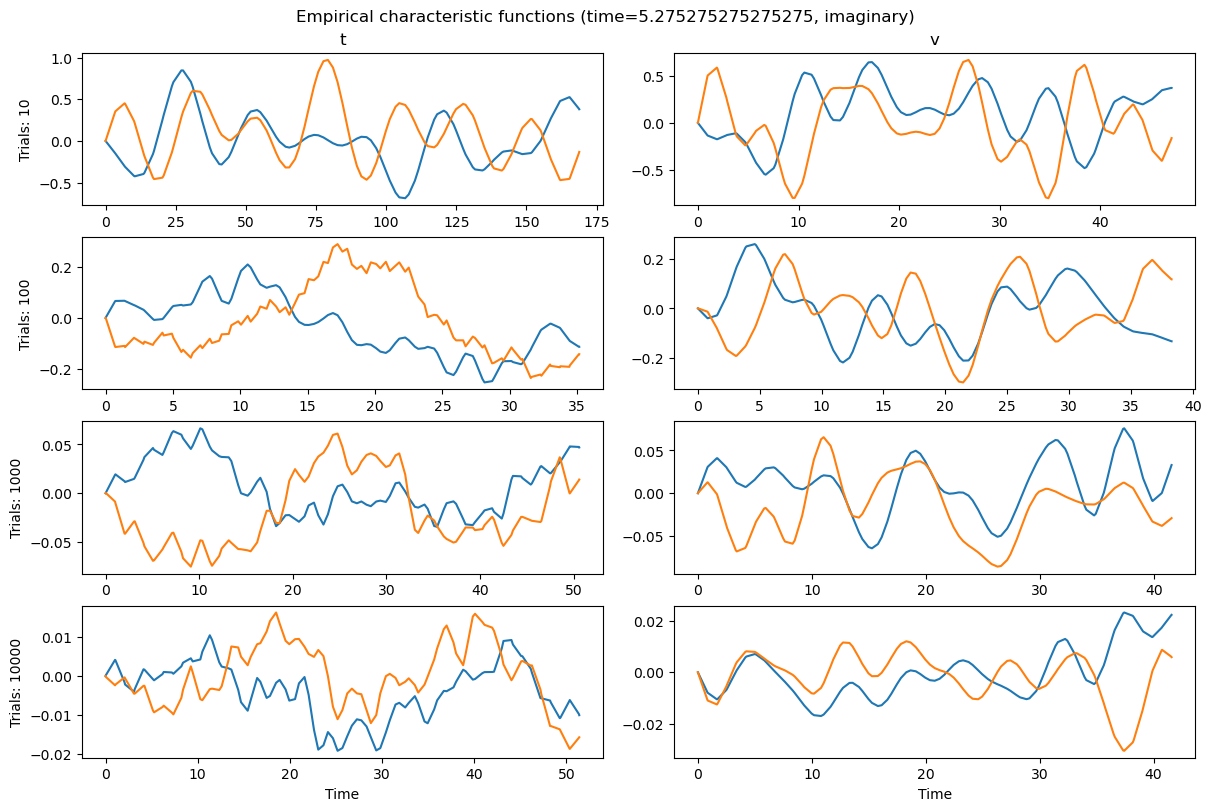

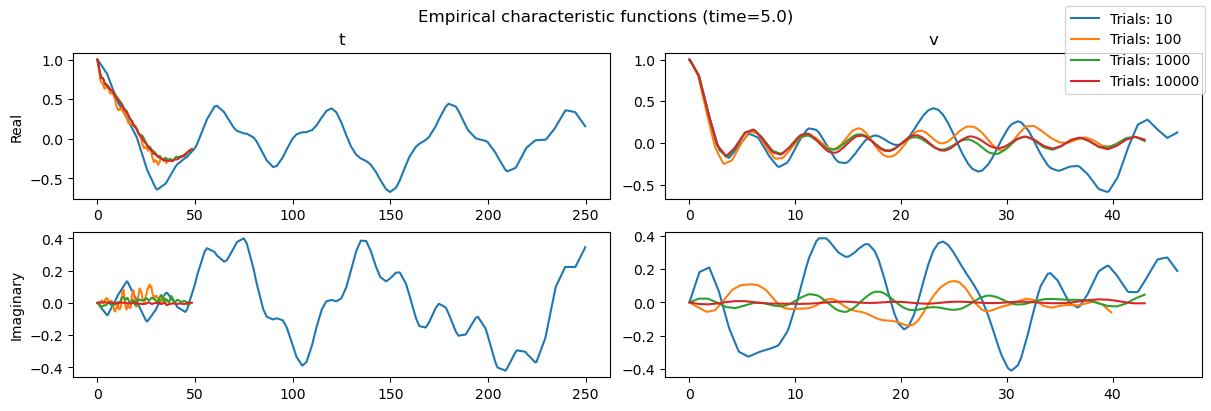

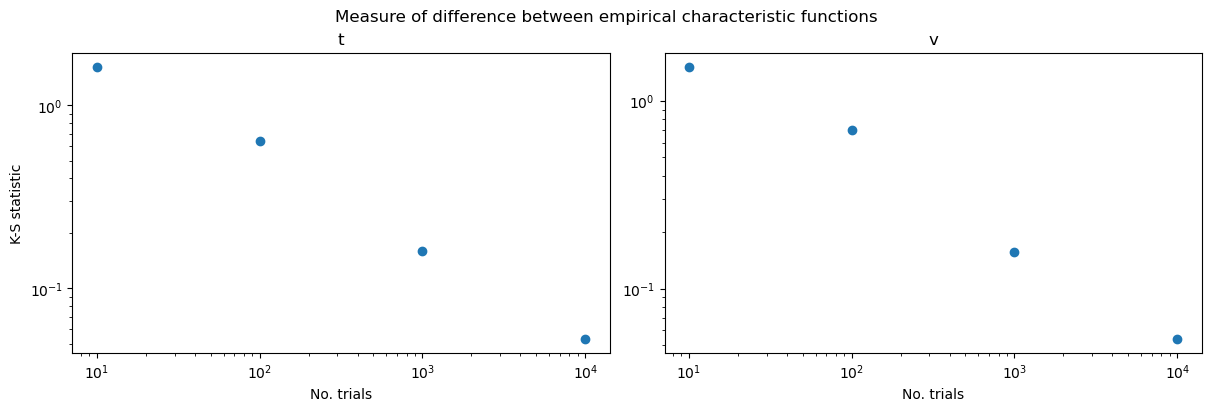

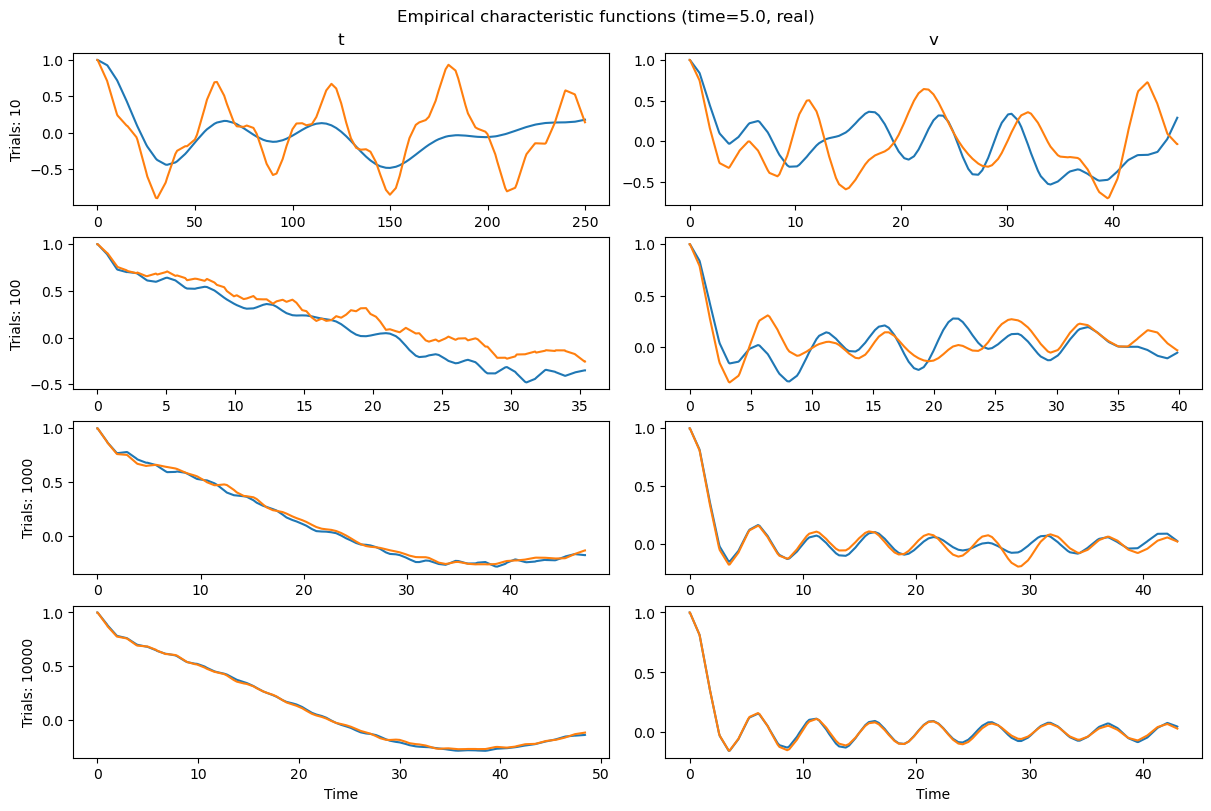

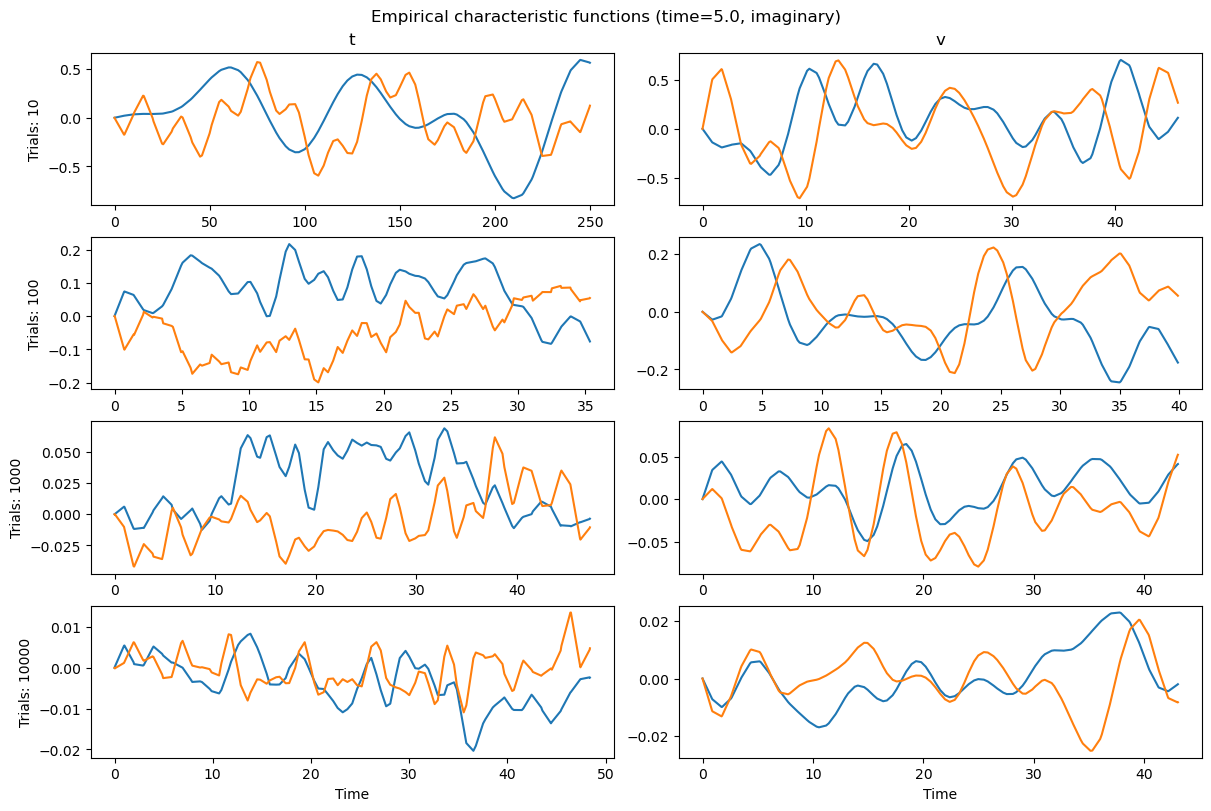

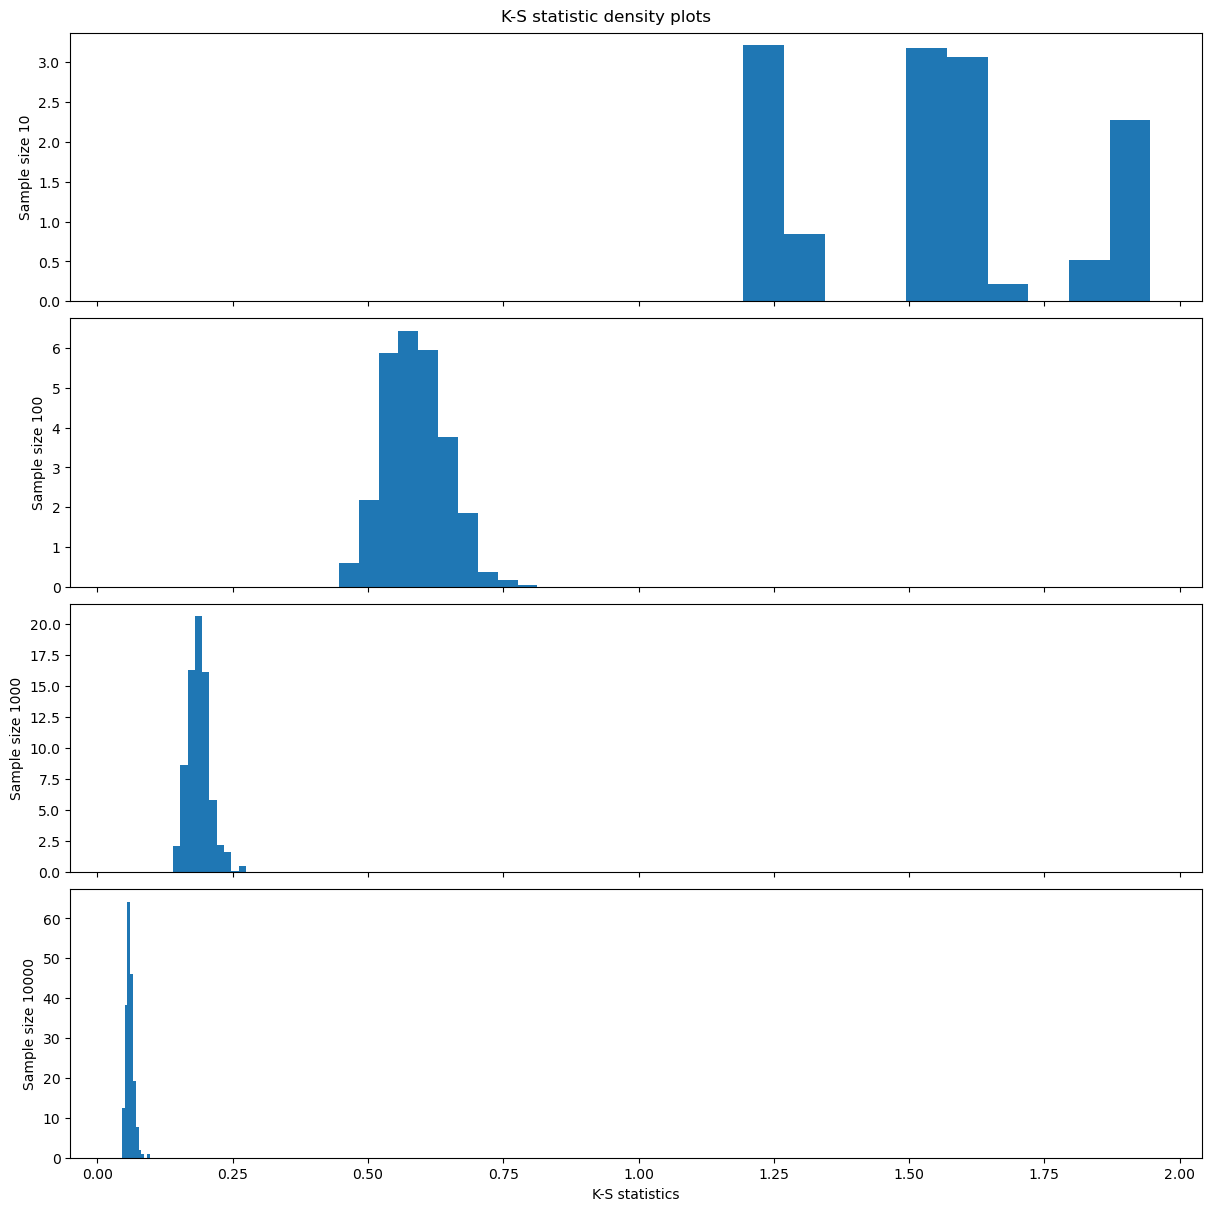

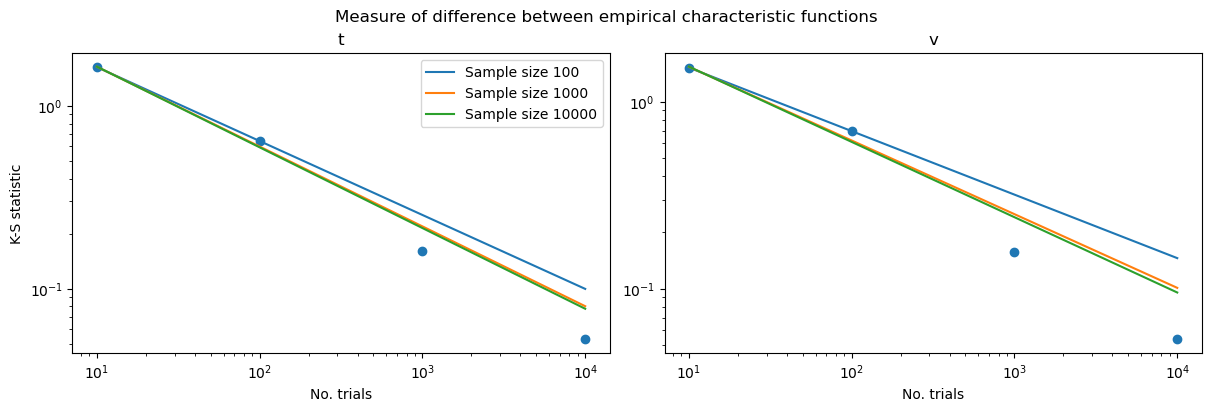

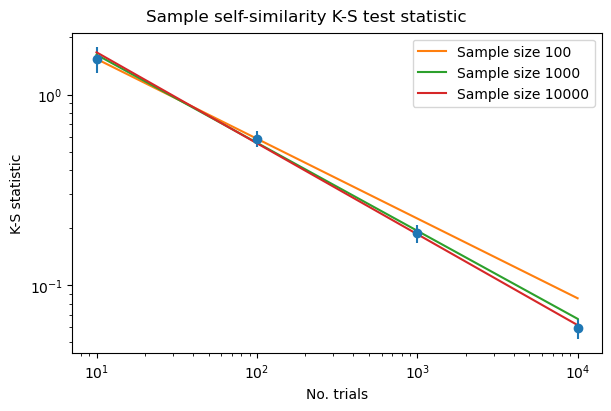

In [3]:
# Runtime: ~29 minutes (M1 max)
test = Test(model=model_nlpendulum({'t': ('norm', (0.0, 1.0))}), **test_kwargs)
do_test(test)
do_fits(test)

Test 3: value of $a$ from a normal distribution. 

Output()

10 trials
	t: 1.7235812842560727
	v: 1.684566856718155
100 trials
	t: 0.5605390682458031
	v: 0.5394836695411933
1000 trials
	t: 0.18266828112325867
	v: 0.18089385199266325
10000 trials
	t: 0.05665285846851516
	v: 0.05764671290510059


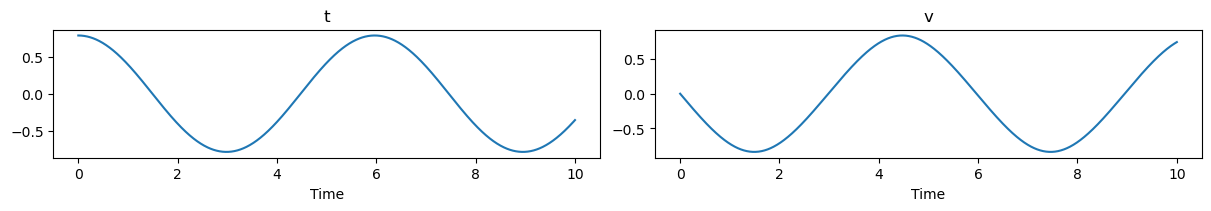

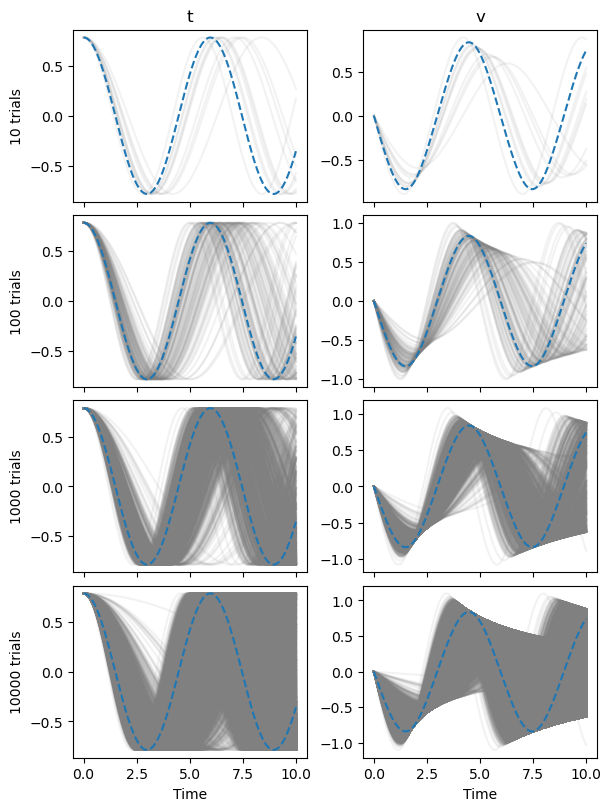

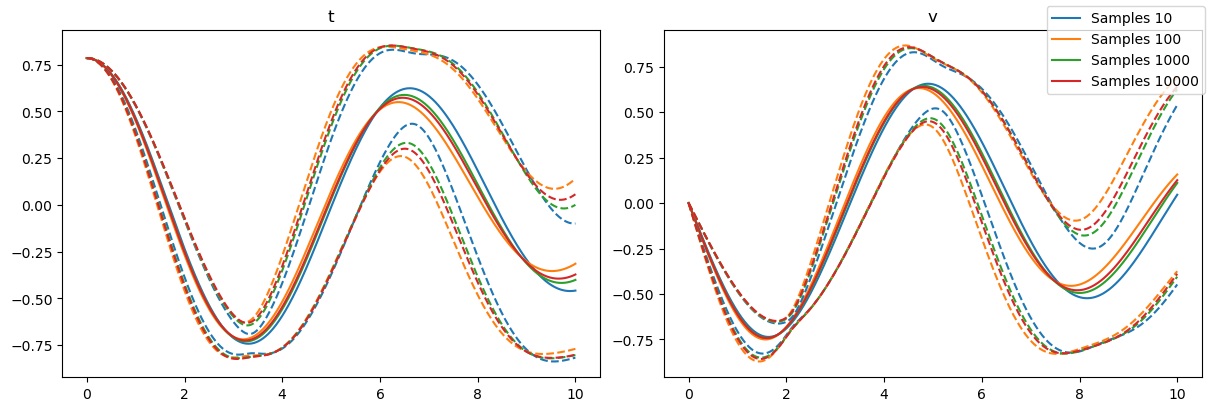

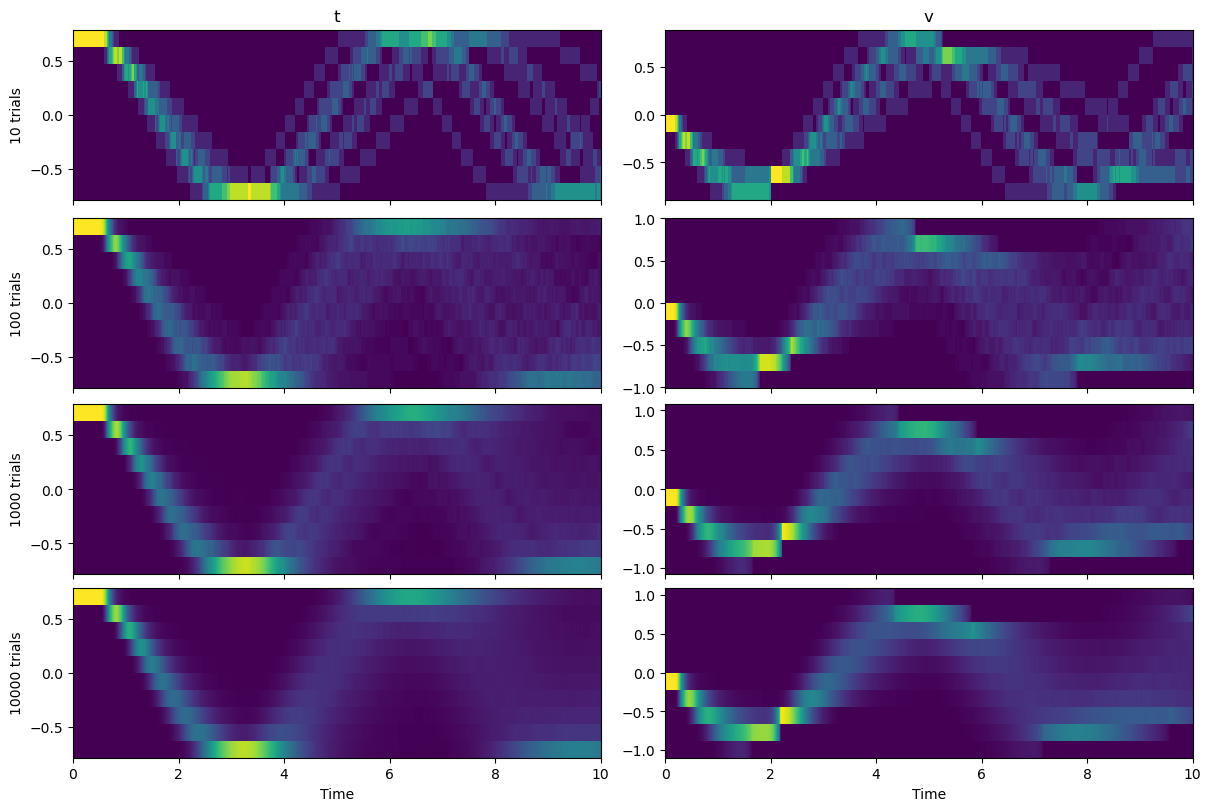

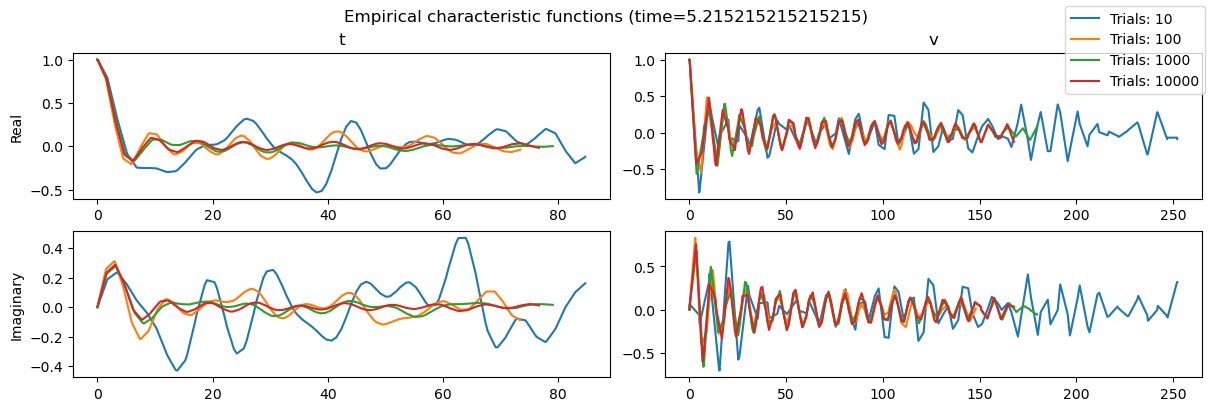

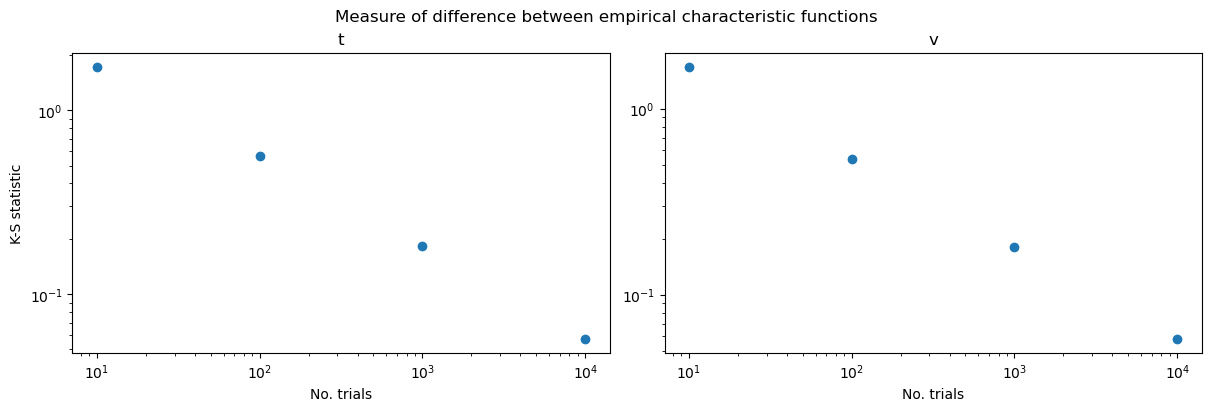

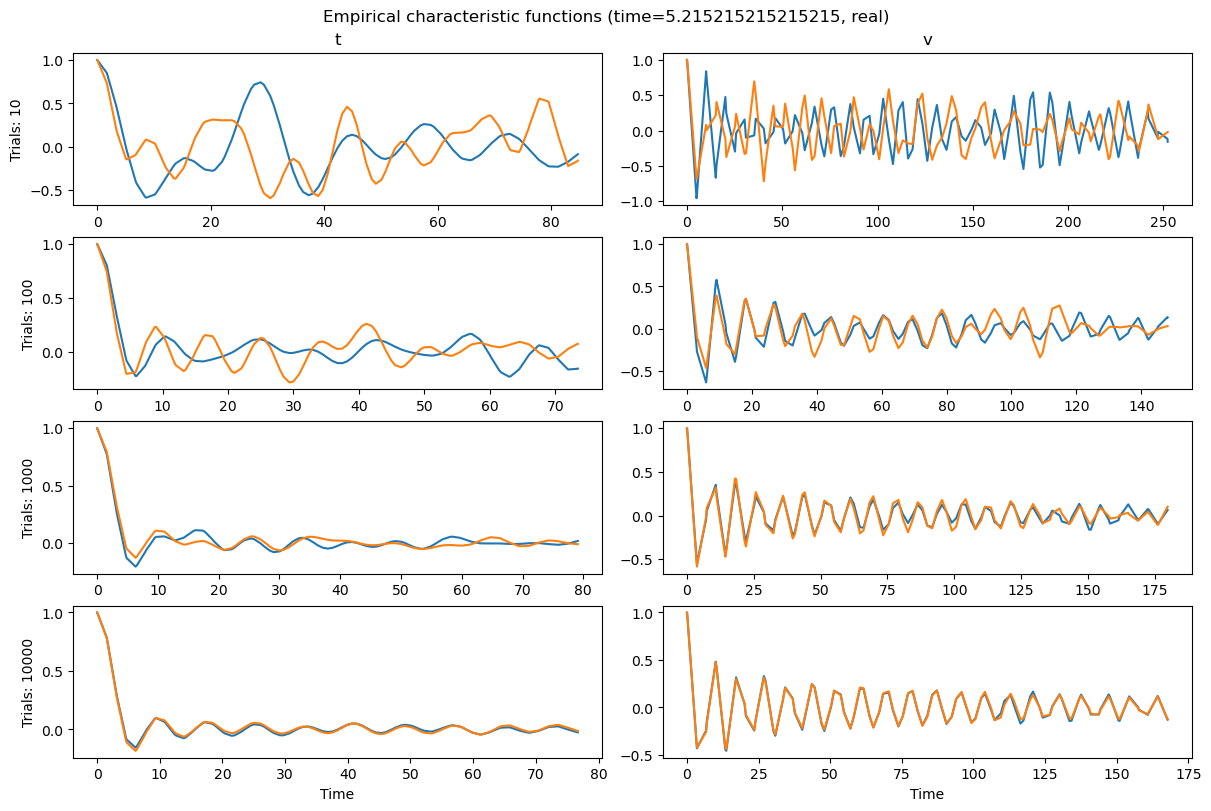

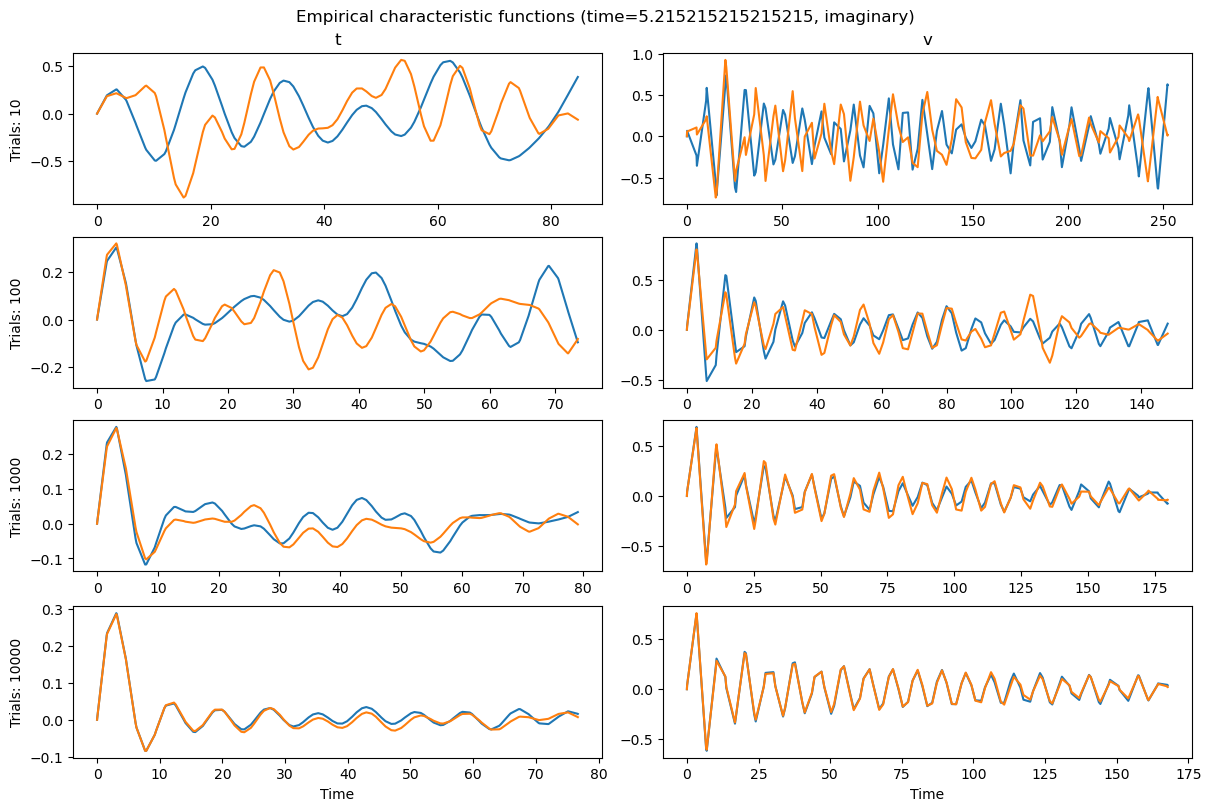

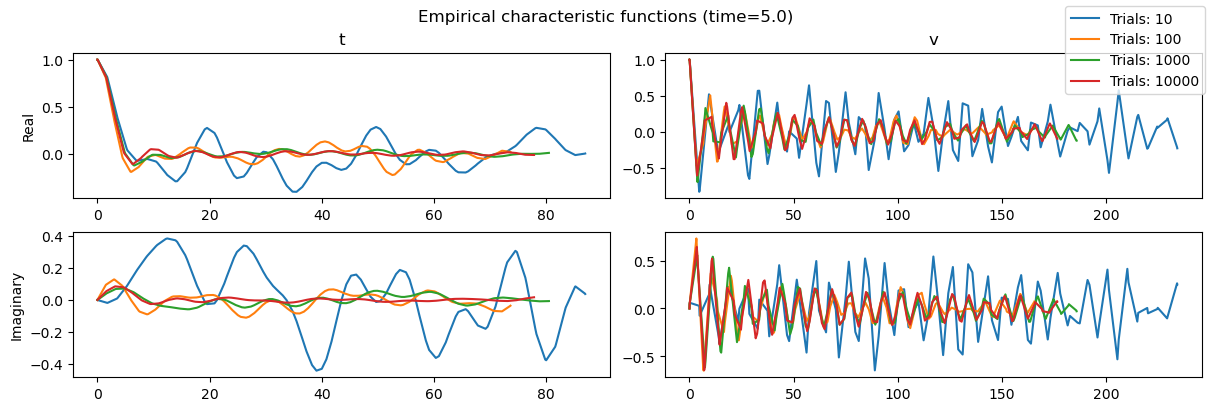

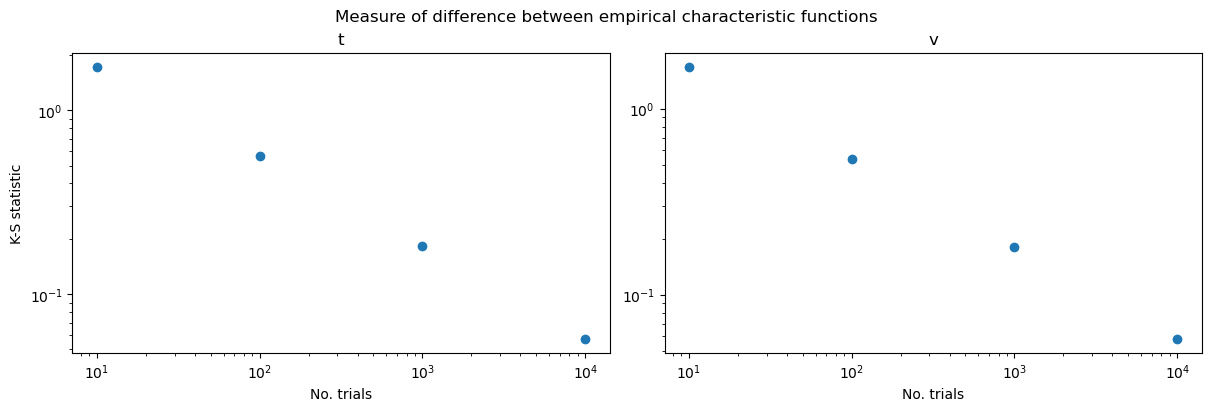

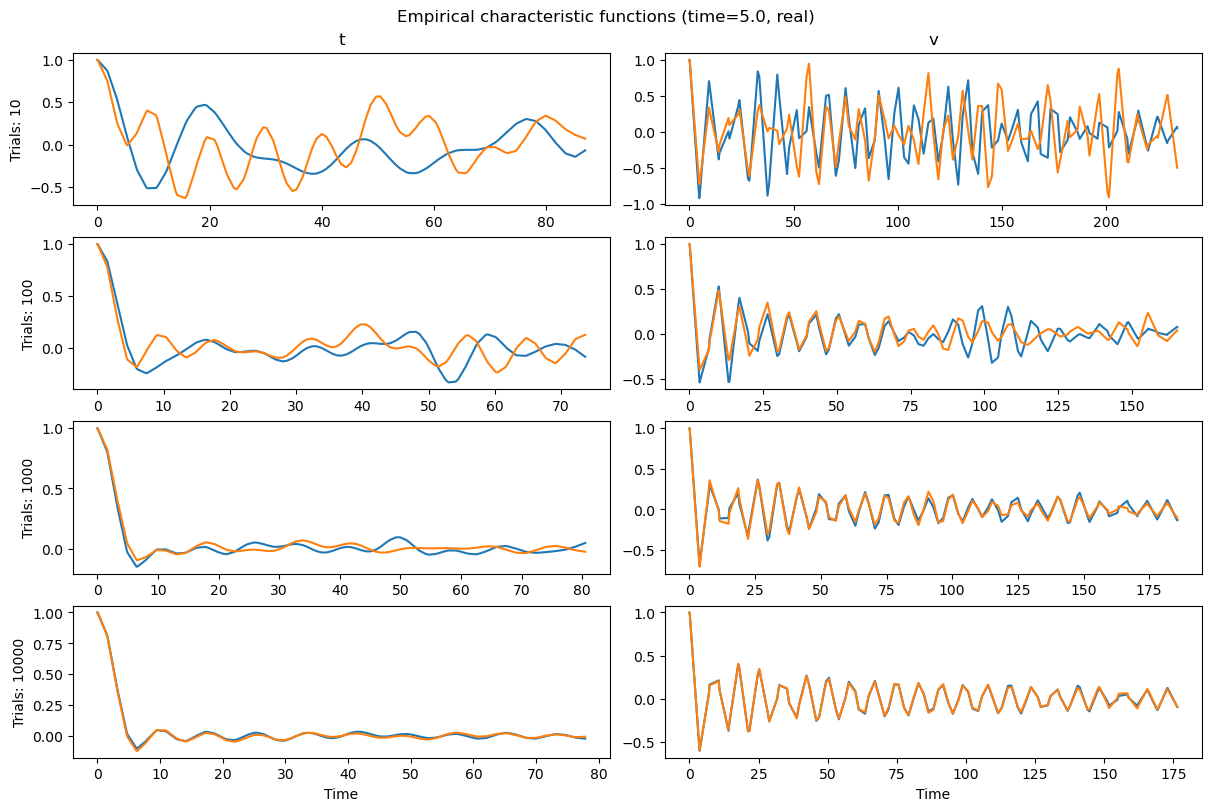

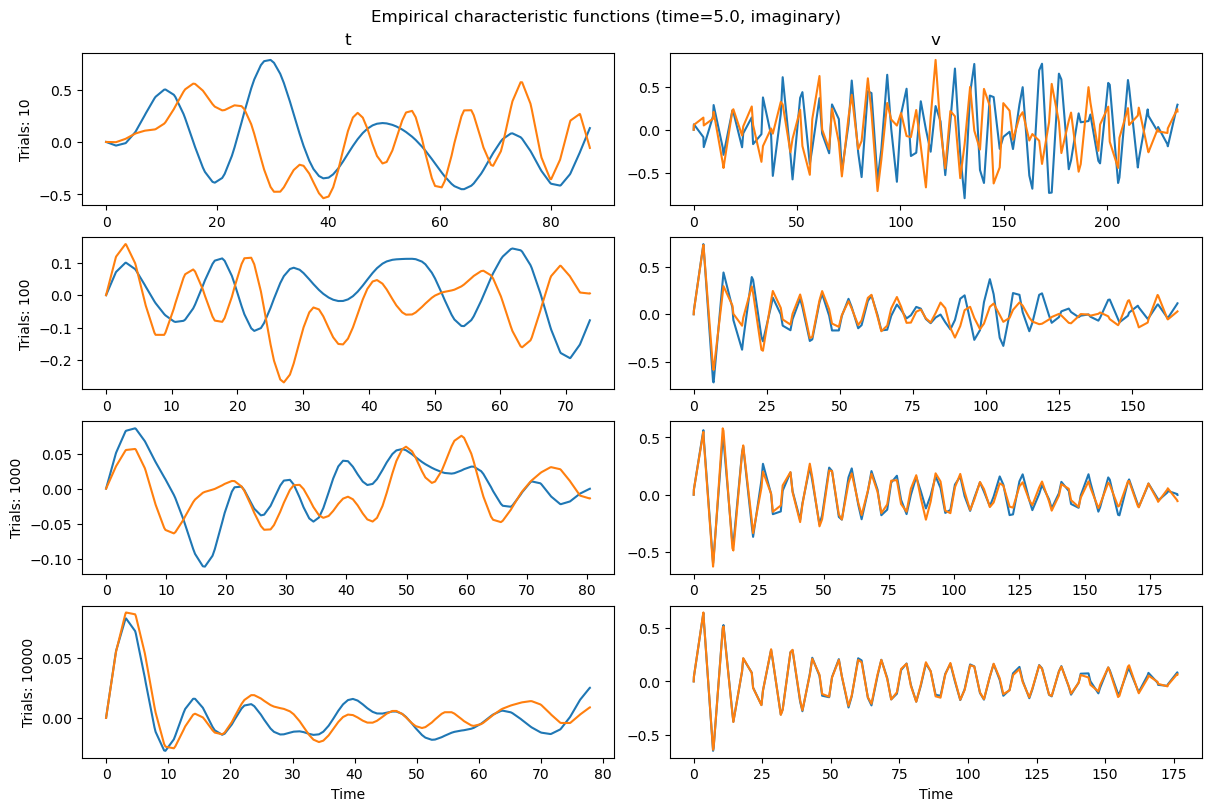

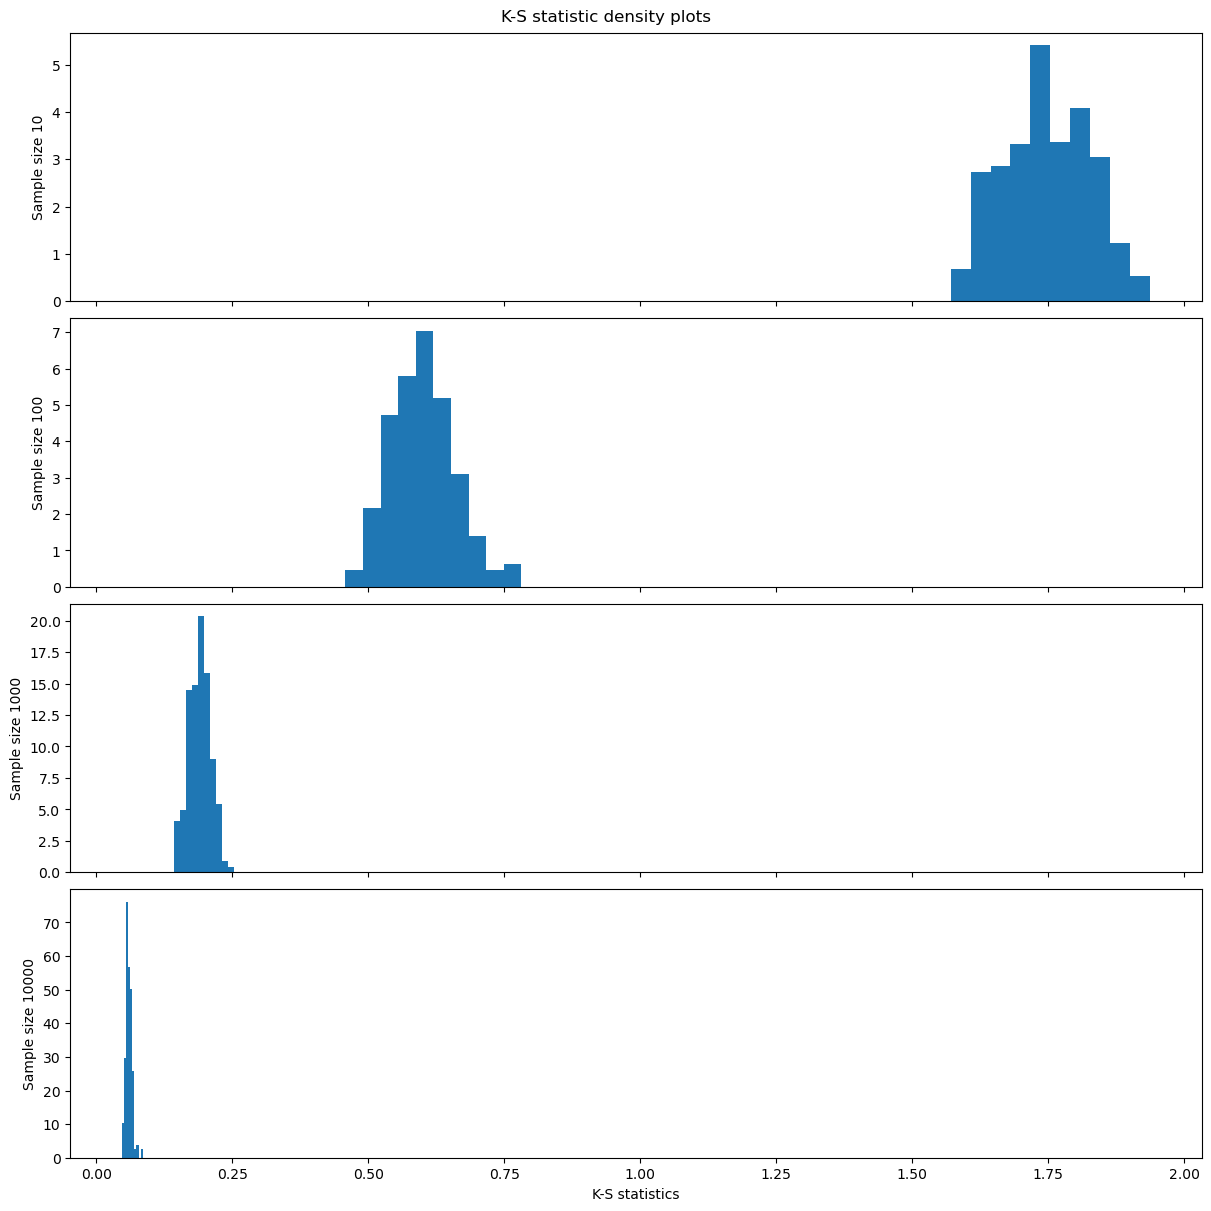

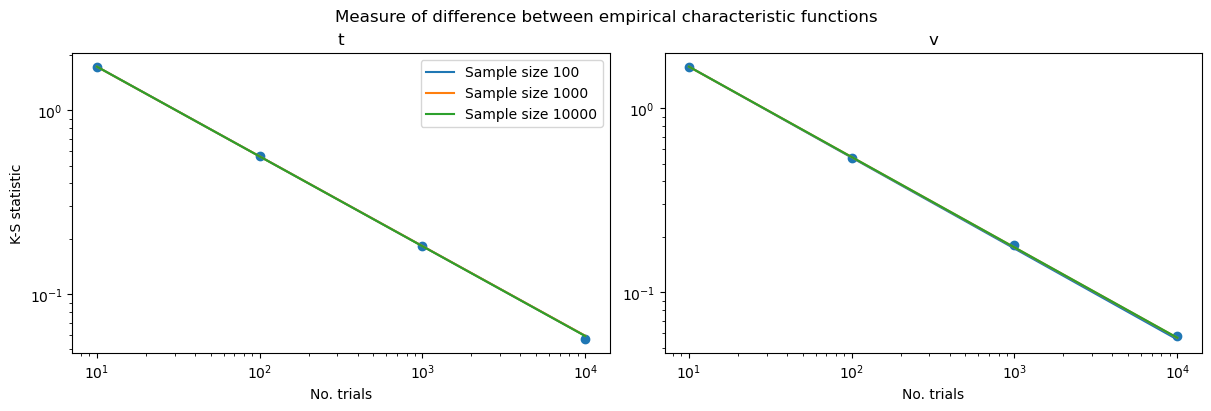

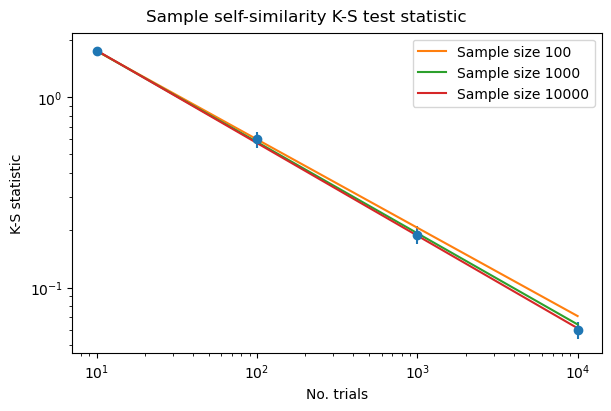

In [4]:
# Runtime: ~26 minutes (M1 max)
test = Test(model=model_nlpendulum({'a': ('norm', (1.0, 0.25))}), **test_kwargs)
do_test(test)
do_fits(test)